<a href="https://colab.research.google.com/github/gulabpatel/ML-Algos/blob/main/Comparing_Classifications_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate Synthetic data

In [16]:
#Import Library
import pandas as pd
from sklearn.datasets import make_classification

In [18]:
#Generate dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=5, n_redundant=0, random_state=1)

In [19]:
X.shape, y.shape

((1000, 5), (1000,))

In [20]:
#Split dataset
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape, y_train.shape

((800, 5), (800,))

In [23]:
X_test.shape, y_test.shape

((200, 5), (200,))

#Build Classification Models

In [24]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

##Defining learning classifiers

In [26]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

##Build Model, Apply Model on Test Data & Record Accuracy Scores

In [27]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

#Model Performance

##Create data frame of model performance

In [28]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.815
1,Linear_SVM,0.840
2,Polynomial_SVM,0.800
3,RBF_SVM,0.830
4,Gaussian_Process,0.875
5,Gradient_Boosting,0.835
6,Decision_Tree,0.845
7,Extra_Trees,0.825
8,Random_Forest,0.860
9,Neural_Net,0.870


##Adding colors to the data frame

In [30]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.815000
1,Linear_SVM,0.840000
2,Polynomial_SVM,0.800000
3,RBF_SVM,0.830000
4,Gaussian_Process,0.875000
5,Gradient_Boosting,0.835000
6,Decision_Tree,0.845000
7,Extra_Trees,0.825000
8,Random_Forest,0.860000
9,Neural_Net,0.870000


##Bar plot of model performance

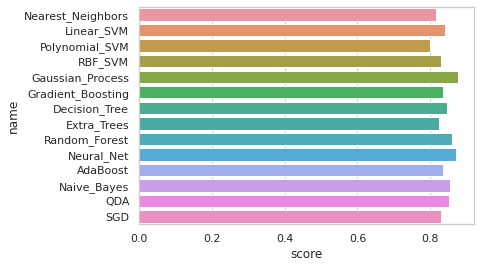

In [31]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)